<a href="https://colab.research.google.com/github/dhgrassi/Grupo-de-Estudos-DS/blob/main/TCC_Teste_com_Dados_Reais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm

# importa o data set
from google.colab import files
uploaded = files.upload()


Saving HCL Castro.xlsx to HCL Castro (8).xlsx


In [221]:
import io
df = pd.read_excel(io.BytesIO(uploaded['HCL Castro.xlsx']))
df

,Data,Tanque de HCL (%)
0,2018-01-01,57.851849
1,2018-01-02,55.458786
2,2018-01-03,53.312088
3,2018-01-04,51.242786
4,2018-01-05,49.291496
...,...,...
360,2018-12-27,68.598457
361,2018-12-28,67.99826
362,2018-12-29,66.14859
363,2018-12-30,62.817268


In [222]:
!pip install sktime
from sktime.utils.plotting import plot_series

In [223]:
df.head()

,Data,Tanque de HCL (%)
0,2018-01-01,57.851849
1,2018-01-02,55.458786
2,2018-01-03,53.312088
3,2018-01-04,51.242786
4,2018-01-05,49.291496


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               365 non-null    datetime64[ns]
 1   Tanque de HCL (%)  365 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 5.8+ KB


In [225]:
#Setting date as the index
df.set_index('Data', inplace=True, drop=True)

In [226]:
#Tanque de HCL (%) columns is an object due to error values
#list of non real values
nans = df[~df.applymap(np.isreal).all(1)]
nans

,Tanque de HCL (%)
Data,
2018-02-23,Calculation aborted
2018-04-07,Calculation aborted
2018-04-22,Calculation aborted
2018-05-20,Calculation aborted
2018-06-03,Calculation aborted
2018-06-11,Calculation aborted
2018-07-01,Calculation aborted
2018-08-13,Calculation aborted
2018-08-14,Calculation aborted


In [227]:
#transforming strings in Nan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [228]:
#filling Nan values with previous valid number
#df.fillna(method="ffill", inplace="true")
df = df.fillna(df.mean())

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tanque de HCL (%)  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [230]:
import matplotlib
matplotlib.style.use('ggplot')

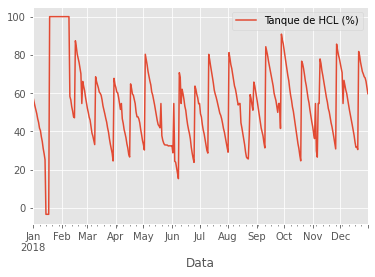

In [231]:
 df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c5c964c90>]],
      dtype=object)

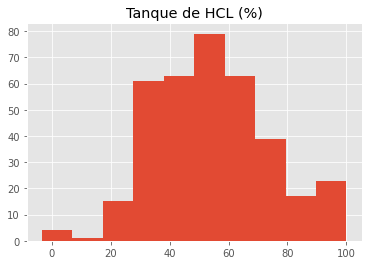

In [232]:
df.hist()

SEPARATING IN TRAIN AND TEST IN ORDER TO EVALUATE PREDICTION MODEL

In [234]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [235]:
df.asfreq('D').index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [253]:
y = df
y_train, y_test = temporal_train_test_split(y, test_size=10)
# we will try to forecast y_test from y_train
y_test

,Tanque de HCL (%)
2018-12-22,79.645981
2018-12-23,76.207855
2018-12-24,73.740448
2018-12-25,71.321625
2018-12-26,70.082489
2018-12-27,68.598457
2018-12-28,67.998260
2018-12-29,66.148590
2018-12-30,62.817268
2018-12-31,59.727993


355 10


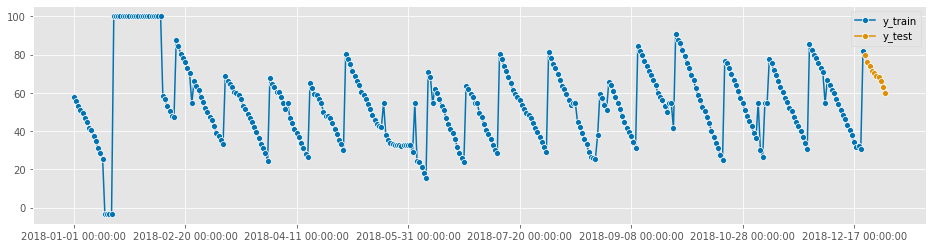

In [254]:
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [256]:
#fh = ForecastingHorizon(
    #pd.PeriodIndex(pd.date_range("2020-01-01", periods=5, freq="D")), is_relative=False)
#fh

#fh = np.arange(1, 37)
#fh

In [257]:
df.asfreq('D').index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [260]:
y_train.asfreq('D').index


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15',
               '2018-12-16', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21'],
              dtype='datetime64[ns]', length=355, freq='D')

In [266]:
fh = ForecastingHorizon(
    values=y_test.asfreq('D').index, is_relative=False)
fh

ForecastingHorizon(['2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='D', is_relative=False)

In [268]:
forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y_train)

forecaster.predict(fh)

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:533: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:


AttributeError: ignored

In [94]:
# plotting for illustration
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

NameError: ignored